# WORLD HAPPINESS PROJECT

# OBJECTIVE: 

Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
df.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.shape

(158, 12)

# About The Columns:

1. Country: 

This columns shows the coutry names of nationality of the countries.


2. Region: 

It shows all the specific regions in the countries.


3.Happiness Rank:

It shows the all the happiness rankings in the form of numbers from top to bottom.


4. Happiness Score: 

This columns shows the scores of country happiness.


5. Standard error: 

It shows how accurate the mean of any given sample from that population is likely to be compared to the true population mean.


6. Economy:

It show the state of a country or region in terms of the production and consumption of goods and services and the supply of money.


7. Family:

It shows a group of one or more parents and their children living together as a unit.


8. Health:

This columns deines the health is a state of complete physical, mental, and social well-being and not merely the absence of disease or infirmity.


9. Freedom:

It shows the quality or state of being free: such as. a : the absence of necessity, coercion, or constraint in choice or action. b : liberation from slavery or restraint or from the power of another : independence. c : the quality or state of being exempt or released usually from something onerous freedom from care.



10. Trust:

It shows the Political corruption or Malpolitics is the use of powers by government officials or their network contacts for illegitimate private gain.


11. Generosity:

It show the quality of being willing to share.


12. Dystopia Residual:

It shows the imaginary country that has the world's least-happy people. Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

In [6]:
# mean and median values are comparable or not
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
#checking for Null Values and from below table there isn't any Null Values.
df.isnull().sum() 

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
#Happiness Rank is not giving any specific information to score.
# Also Region is irrelevant.
df=df.drop(['Region','Country','Happiness Rank'],axis=1)

In [9]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Removing Outliers:

Z-score Technique

In [10]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(158, 9)

In [11]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [13]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(158, 9)
(149, 9)


# Percentage Data Loss:

In [34]:
loss_percent=(158-149)/158*100
print(loss_percent)

5.69620253164557


Checking whether how much outliers are still there. If the outliers there help in the testing the model or not.

# Model Without Outliers is df and model with desired outliers is df_new1:

In [35]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

# Transforming data to remove skewness:

In [36]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [37]:
x

array([[ 1.82591162, -0.95033703,  1.49245411, ...,  1.75498231,
         1.81762512,  0.65957854],
       [ 1.80625025,  0.37856182,  1.19406711, ...,  1.44218194,
         0.32967609,  1.56260401],
       [ 1.78048469, -1.04140135,  1.26661161, ...,  1.61603678,
         1.95339954,  0.97722591],
       ...,
       [-1.7899869 , -1.32081011, -1.36521585, ..., -1.26539516,
        -0.19284338,  1.13425805],
       [-2.05390647, -0.69272644, -1.43304072, ...,  0.3181233 ,
        -0.4344978 , -0.31207994],
       [-2.56623509,  2.17876604, -1.93874732, ..., -1.84989338,
        -0.14727362, -0.17248609]])

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.82591162, -0.95033703,  1.49245411, ...,  1.75498231,
         1.81762512,  0.65957854],
       [ 1.80625025,  0.37856182,  1.19406711, ...,  1.44218194,
         0.32967609,  1.56260401],
       [ 1.78048469, -1.04140135,  1.26661161, ...,  1.61603678,
         1.95339954,  0.97722591],
       ...,
       [-1.7899869 , -1.32081011, -1.36521585, ..., -1.26539516,
        -0.19284338,  1.13425805],
       [-2.05390647, -0.69272644, -1.43304072, ...,  0.3181233 ,
        -0.4344978 , -0.31207994],
       [-2.56623509,  2.17876604, -1.93874732, ..., -1.84989338,
        -0.14727362, -0.17248609]])

# Correlation:

In [14]:
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


# VISUALIZATION:

<function matplotlib.pyplot.show(close=None, block=None)>

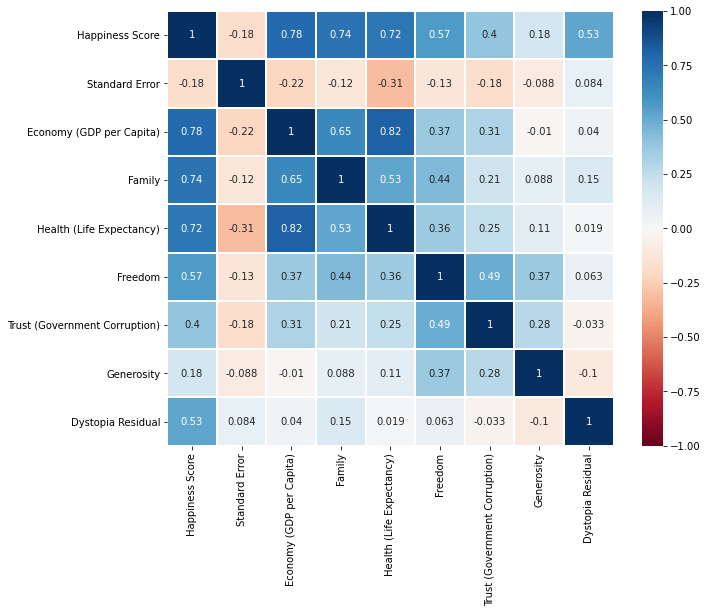

In [15]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='RdBu',vmin=-1,vmax=+1,linewidth=1)
plt.show
#there are no negative correlation in the heatmap.

Total number of rows and columns in the datasets:
    
    1.158 rows
    2.9 columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


# Outliers Checking:

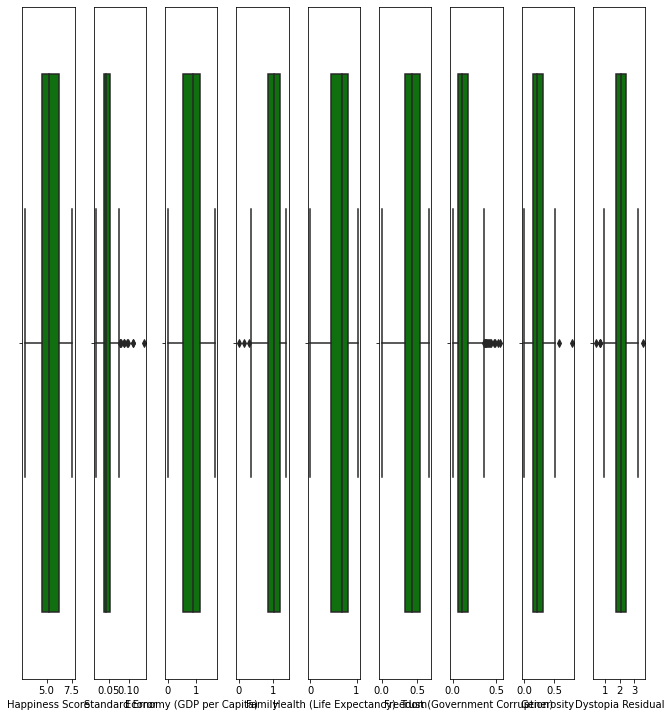

In [17]:
collist=df.columns.values
ncol=9
nrows=30
plt.figure(figsize=(ncol,33*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Skewness: 

In [18]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Normal Distribution Curve:

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

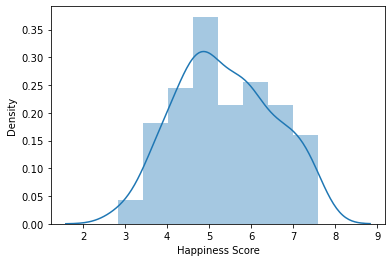

In [19]:
sns.distplot(df["Happiness Score"])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

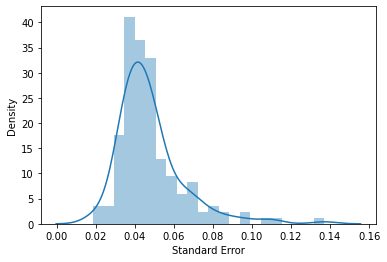

In [20]:
sns.distplot(df["Standard Error"])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

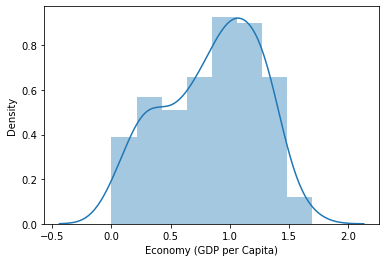

In [21]:
sns.distplot(df["Economy (GDP per Capita)"])

<AxesSubplot:xlabel='Family', ylabel='Density'>

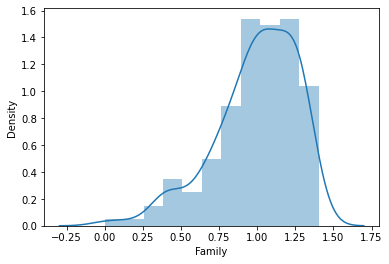

In [22]:
sns.distplot(df["Family"])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

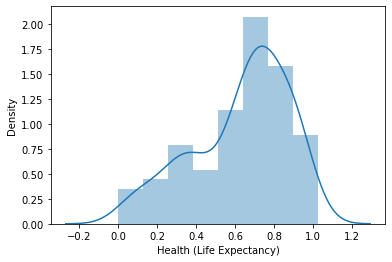

In [23]:
sns.distplot(df["Health (Life Expectancy)"])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

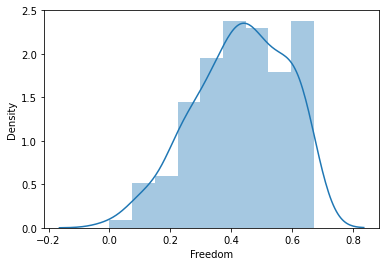

In [24]:
sns.distplot(df["Freedom"])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

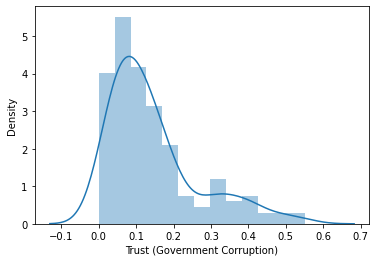

In [25]:
sns.distplot(df["Trust (Government Corruption)"])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

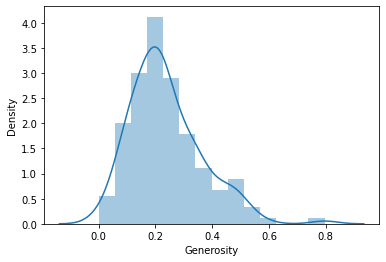

In [26]:
sns.distplot(df["Generosity"])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

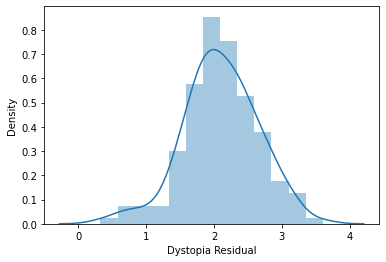

In [27]:
sns.distplot(df["Dystopia Residual"])

# PREPROCESSING THE DATA:

In [28]:
y=df['Happiness Score']
x=df.drop('Happiness Score',axis=1)

In [29]:
#scaling data except target variable
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [30]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.131954,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,0.256311,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,0.124947,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,0.171549,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
...,...,...,...,...,...,...,...,...
153,0.136429,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314,0.104425
154,0.152638,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432,0.398557
155,0.267370,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790,0.000000
156,0.574926,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864,0.459573


# TRAING AND SPLITTING THE DATAFRAME

In [31]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [32]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.9999999389956291

In [33]:
pred=model.predict(x_test)
print(pred)
print(y_test)

[4.30691404 5.98710015 4.19426173 2.90449287 5.0571954  6.57406633
 4.89748444 4.87600118 4.94866753 3.93077512 6.90138853 5.8282786
 6.98259286 5.54816046 6.78624861 6.50509953 4.50715739 4.68556616
 4.97105599 5.69530565 3.65506482 6.93738449 7.19985058 7.2840197
 6.48514136 5.19230384 5.88898221 3.95560134 4.36914736 3.68083676
 3.78075578 5.33248069 3.99476531 5.83264558 4.34997649]
128    4.307
45     5.987
134    4.194
156    2.905
90     5.057
29     6.574
96     4.898
98     4.876
95     4.949
140    3.931
19     6.901
56     5.828
15     6.983
69     5.548
24     6.786
30     6.505
122    4.507
109    4.686
93     4.971
65     5.695
150    3.655
18     6.937
12     7.200
9      7.284
31     6.485
81     5.192
51     5.889
139    3.956
125    4.369
146    3.681
145    3.781
75     5.332
137    3.995
55     5.833
126    4.350
Name: Happiness Score, dtype: float64


Variables Used in Data:

Country: The country in question

Region: The region that the country belongs too (different than continent)

Economy: GDP per capita of the country — individuals rank they quality of life based on the amount they earn

Family: quality of family life, nuclear and joint family

Health: ranking healthcare availability and average life expectancy in the country

Freedom: how much an individual is able to conduct them self based on their free will

Trust: in the government to not be corrupt

Generosity: how much their country is involved in peacekeeping and global aid

Dystopia Residual: Dystopia happiness score (1.85) i.e. the score of a hypothetical country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country (a number that is left over from the normalization of the variables which cannot be explained).